CNN 학습 결과가 잘 나오는 MNIST 데이터셋으로 실습을 진행해봅시다!

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import cv2
import matplotlib.pyplot as plt

In [2]:
# myCNN 클래스 정의
class myCNN(nn.Module):
    def __init__(self):
        super(myCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size = 5, padding = 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size = 5, padding = 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size = 5, padding = 2)
        self.fc1 = nn.Linear(128*3*3, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = x.view(-1, 128*3*3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim = 1)

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train = True, download = True, transform = transform)
test_dataset = datasets.MNIST('./data', train = False, transform = transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 1000, shuffle = False)

모델, 손실 함수, 최적화 알고리즘 설정 ✅

In [4]:
# TODO
learning_rate = 0.001;

model=myCNN()

criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate);
print(model)

myCNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=1152, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


모델 학습 ✅

In [5]:
# TODO
train_losses = []

def train_model(model, train_loader, criterion, optimizer):
    model.train()

    total_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    train_loss = total_loss / len(train_loader)
    train_losses.append(train_loss)
    return train_loss


모델 평가 ✅

In [6]:
# TODO
predictions_list = []
labels_list = []

test_losses = []
test_accuracies = []

def evaluate_model(model, test_loader,criterion):
    model.eval()
    correct = 0
    total = 0
    total_test_loss = 0

    with torch.no_grad():
        for images, labels in test_loader:

            labels_list.append(labels)
            outputs = model(images)
            loss = criterion(outputs, labels)

            total_test_loss += loss.item()

            predictions = torch.max(outputs, 1)[1]
            predictions_list.append(predictions)
            correct += (predictions == labels).sum()
            total += len(labels)

    test_loss = total_test_loss / len(test_loader)
    accuracy = 100 * correct / total
    test_losses.append(test_loss)
    test_accuracies.append(accuracy)
    return test_loss, accuracy

10회 반복 시행 ✅

In [7]:
# TODO
def epochs(model, train_loader, test_loader, criterion, optimizer,n_epochs=10):
    for epoch in range(n_epochs):
        print(f"\n Epoch {epoch+1}/{n_epochs}")
        train_loss = train_model(model, train_loader, criterion, optimizer)

        test_loss, accuracy = evaluate_model(model, test_loader, criterion)


        print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")

epochs(model, train_loader, test_loader, criterion, optimizer,n_epochs=10)


 Epoch 1/10
Train Loss: 0.1322, Test Loss: 0.0428, Accuracy: 98.54%

 Epoch 2/10
Train Loss: 0.0383, Test Loss: 0.0497, Accuracy: 98.49%

 Epoch 3/10
Train Loss: 0.0266, Test Loss: 0.0344, Accuracy: 99.00%

 Epoch 4/10
Train Loss: 0.0207, Test Loss: 0.0317, Accuracy: 99.01%

 Epoch 5/10
Train Loss: 0.0170, Test Loss: 0.0288, Accuracy: 99.11%

 Epoch 6/10
Train Loss: 0.0143, Test Loss: 0.0253, Accuracy: 99.36%

 Epoch 7/10
Train Loss: 0.0115, Test Loss: 0.0417, Accuracy: 98.95%

 Epoch 8/10
Train Loss: 0.0102, Test Loss: 0.0434, Accuracy: 98.95%

 Epoch 9/10
Train Loss: 0.0099, Test Loss: 0.0510, Accuracy: 98.84%

 Epoch 10/10
Train Loss: 0.0088, Test Loss: 0.0332, Accuracy: 99.29%


결과 시각화

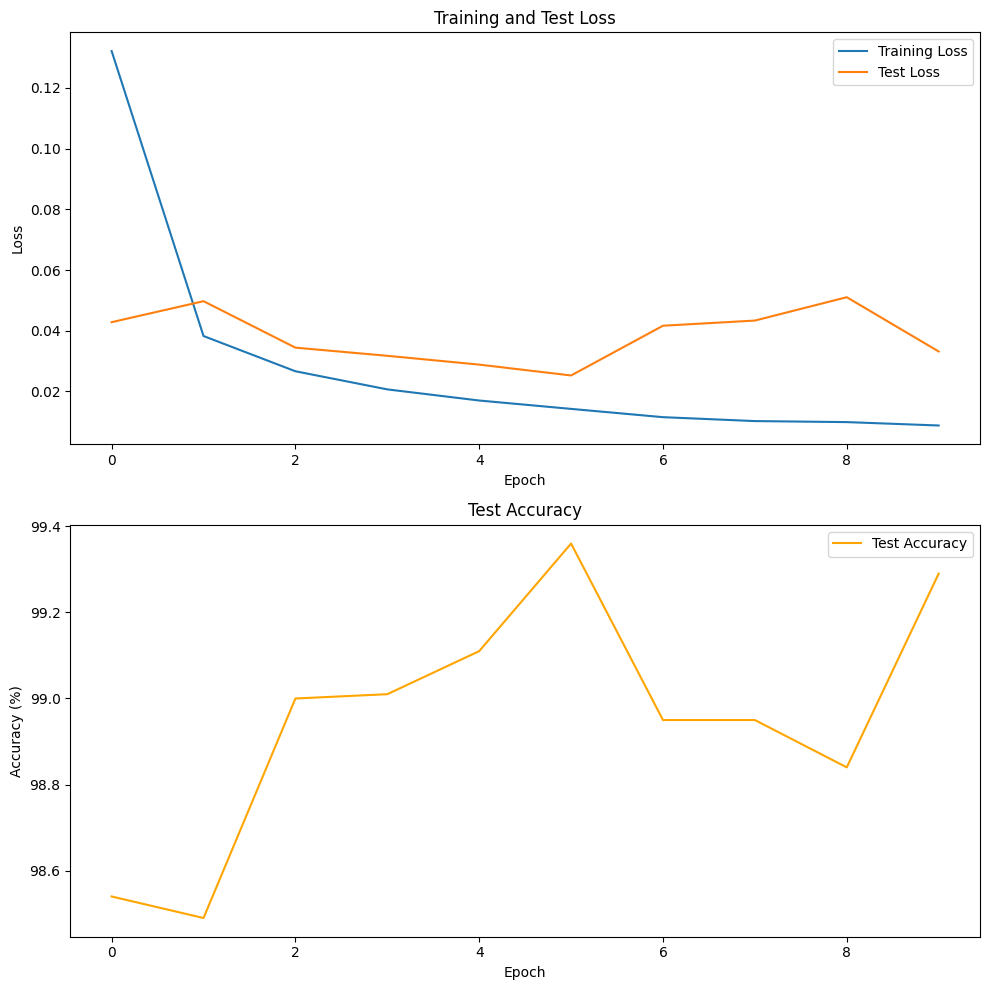

In [8]:
# 손실 및 정확도 시각화
fig, axs = plt.subplots(2,1,figsize=(10,10))
axs[0].plot(train_losses, label = 'Training Loss')
axs[0].plot(test_losses, label = 'Test Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Training and Test Loss')

axs[1].plot(test_accuracies, label='Test Accuracy', color='orange')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy (%)')
axs[1].legend()
axs[1].set_title('Test Accuracy')

plt.tight_layout()
plt.show()